In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("E:/AYUSHI/MICRO SQL/loan/loan.csv", low_memory=False)

# Display the first few rows of the dataset
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [4]:
# Check the data types of each column
print(df.dtypes)

# Check the summary statistics of numeric columns
print(df.describe())

# Check the number of missing values in each column
print(df.isnull().sum())


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  

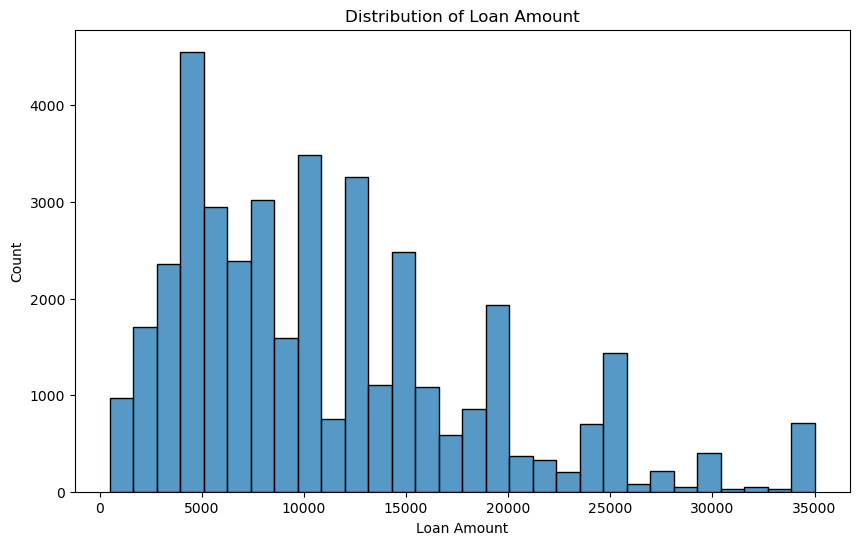

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan_amnt', bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

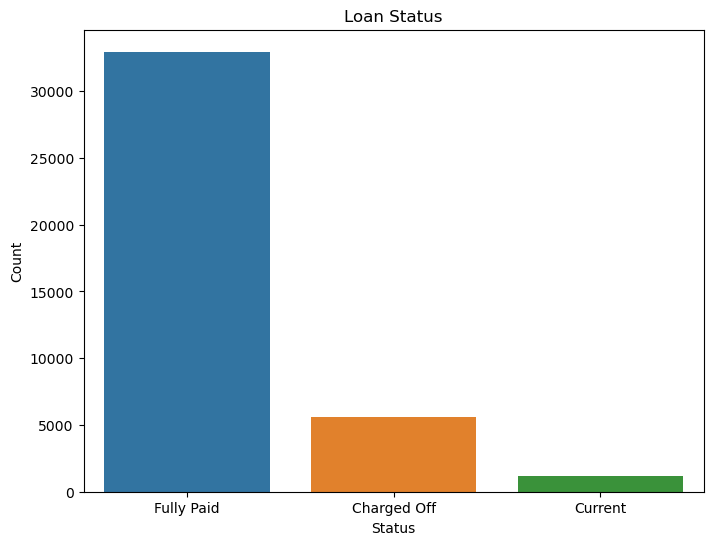

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


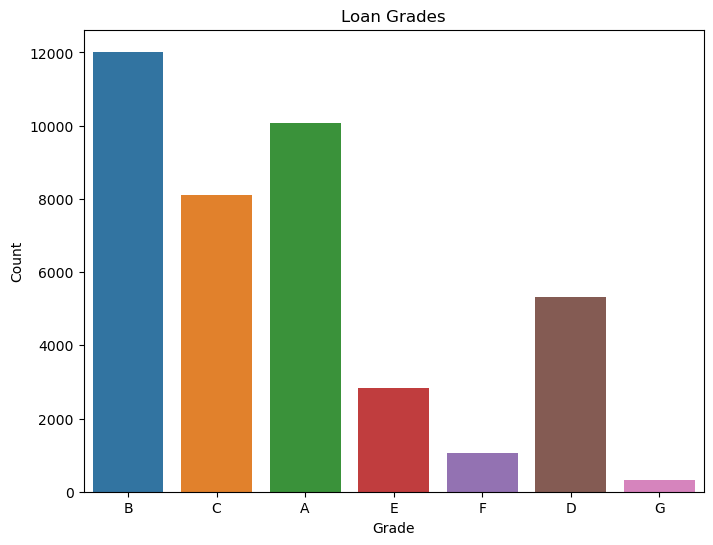

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grade')
plt.title('Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

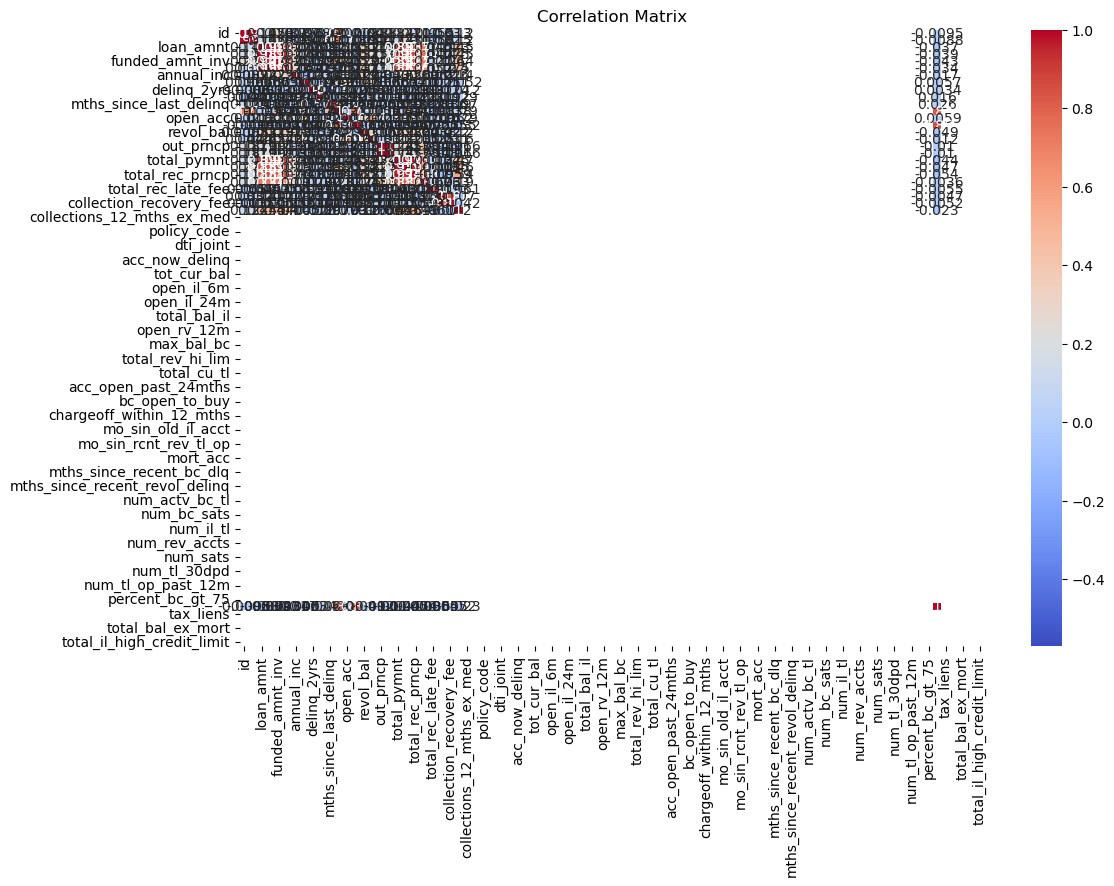

In [10]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


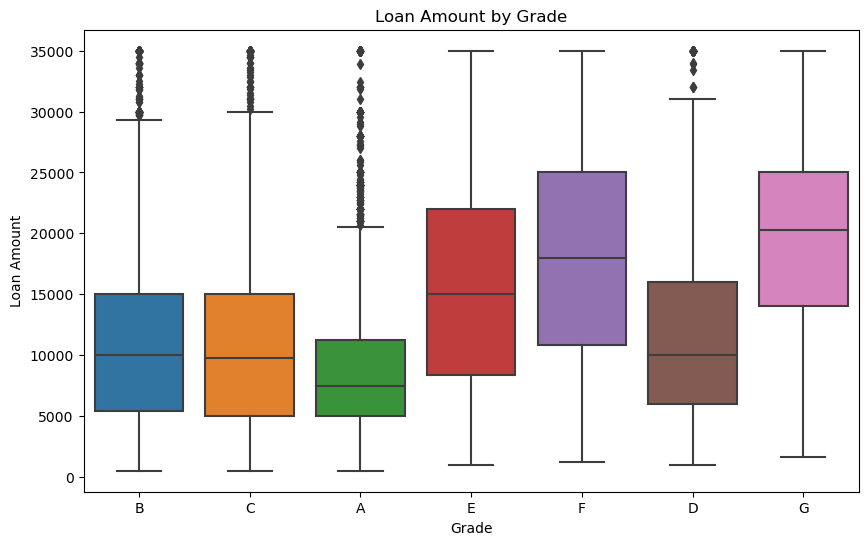

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='grade', y='loan_amnt')
plt.title('Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()


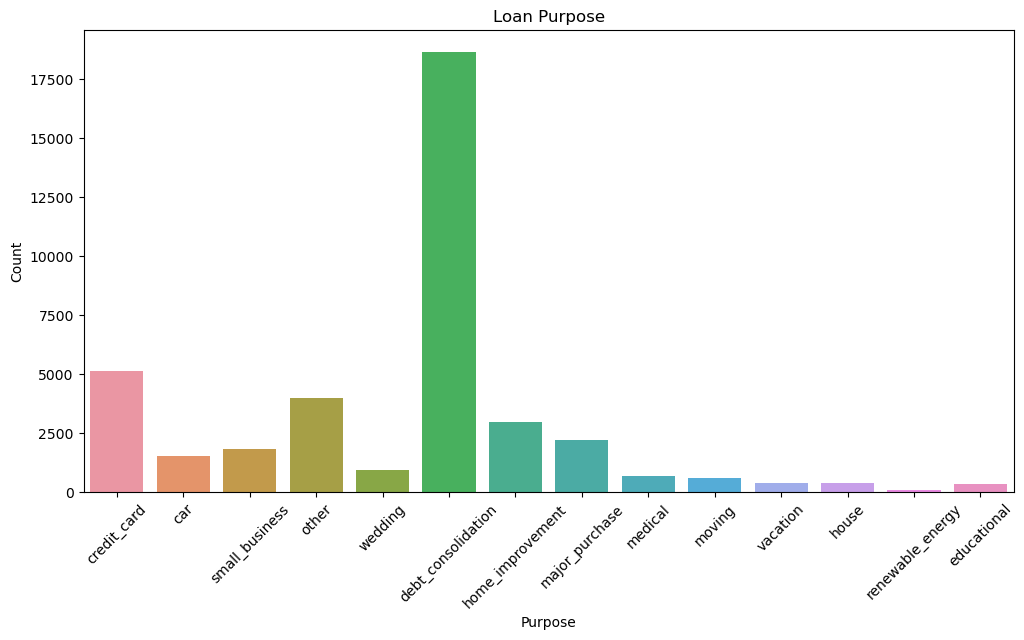

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='purpose')
plt.title('Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


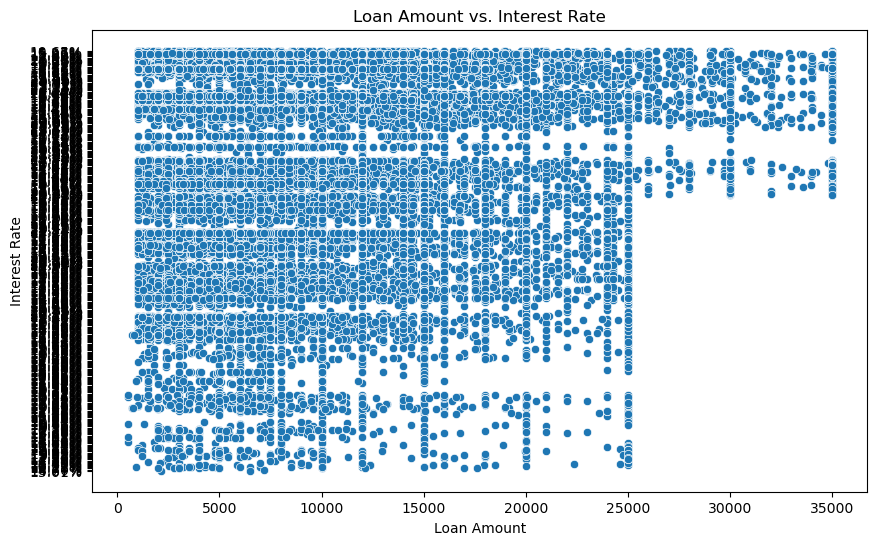

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amnt', y='int_rate')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


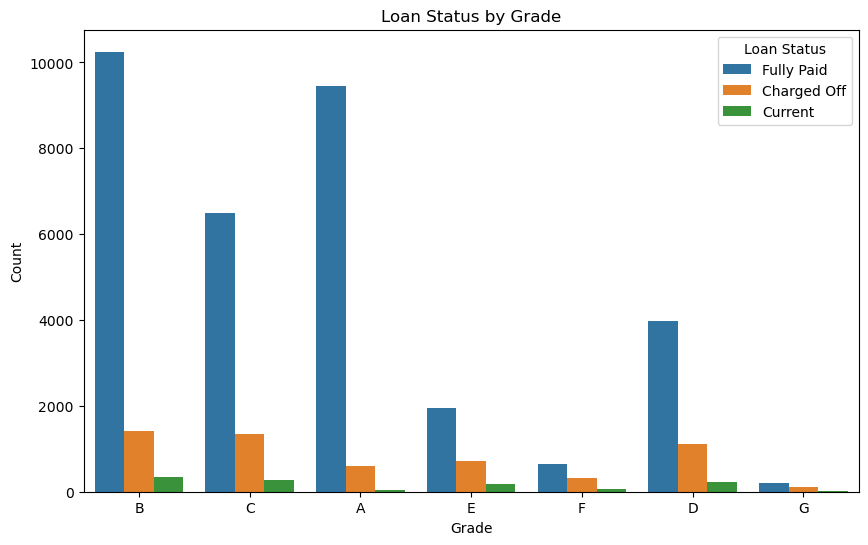

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


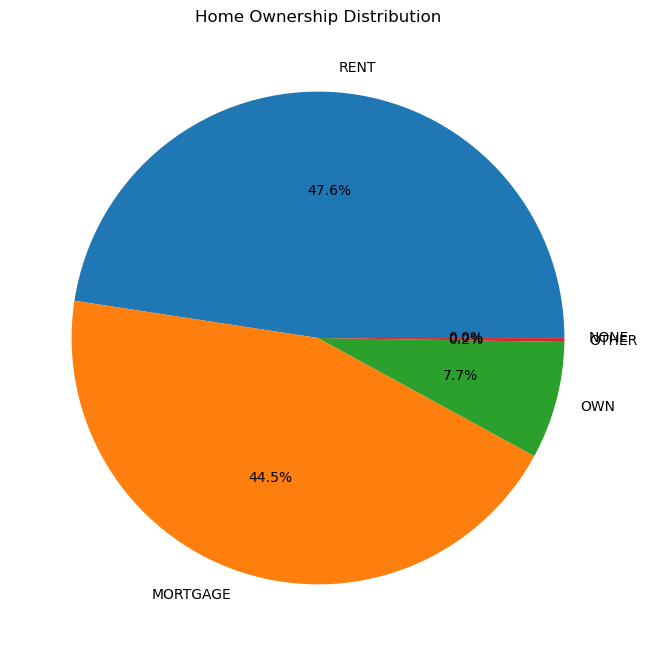

In [15]:
plt.figure(figsize=(8, 8))
df['home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Home Ownership Distribution')
plt.ylabel('')
plt.show()


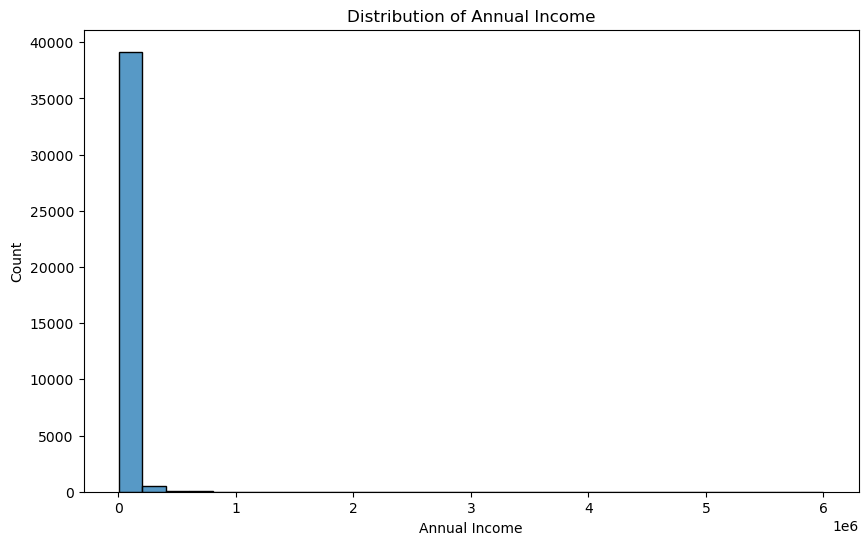

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='annual_inc', bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()


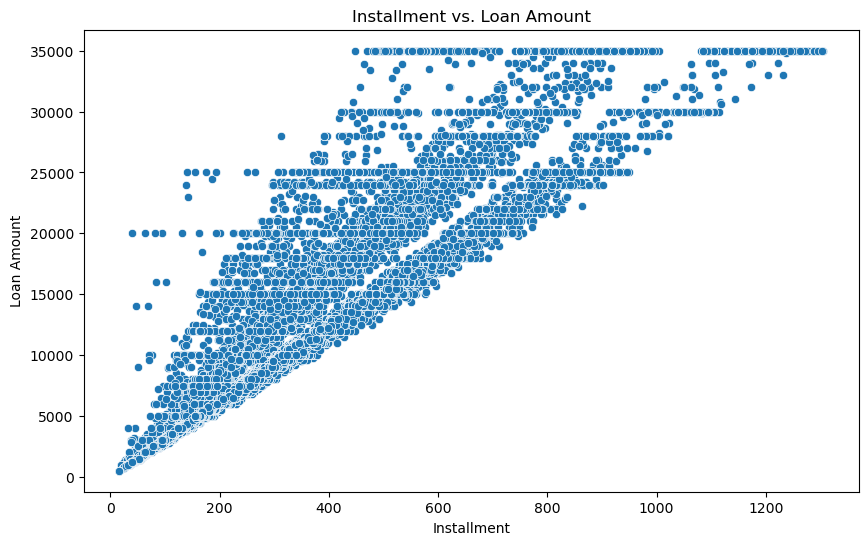

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='installment', y='loan_amnt')
plt.title('Installment vs. Loan Amount')
plt.xlabel('Installment')
plt.ylabel('Loan Amount')
plt.show()


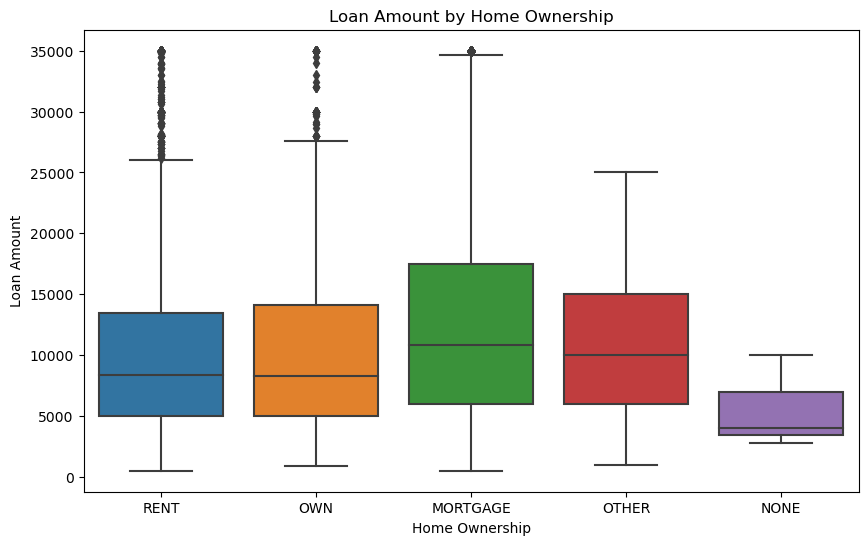

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='home_ownership', y='loan_amnt')
plt.title('Loan Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()


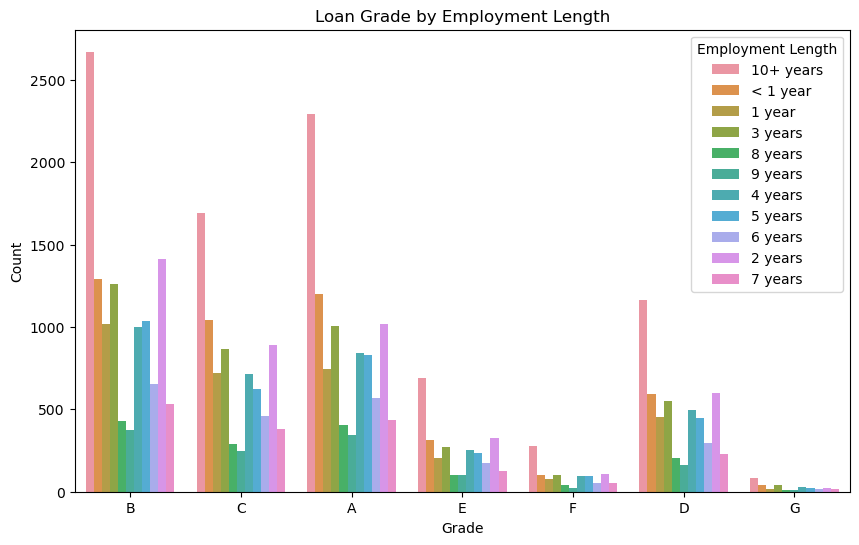

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='emp_length')
plt.title('Loan Grade by Employment Length')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Employment Length')
plt.show()


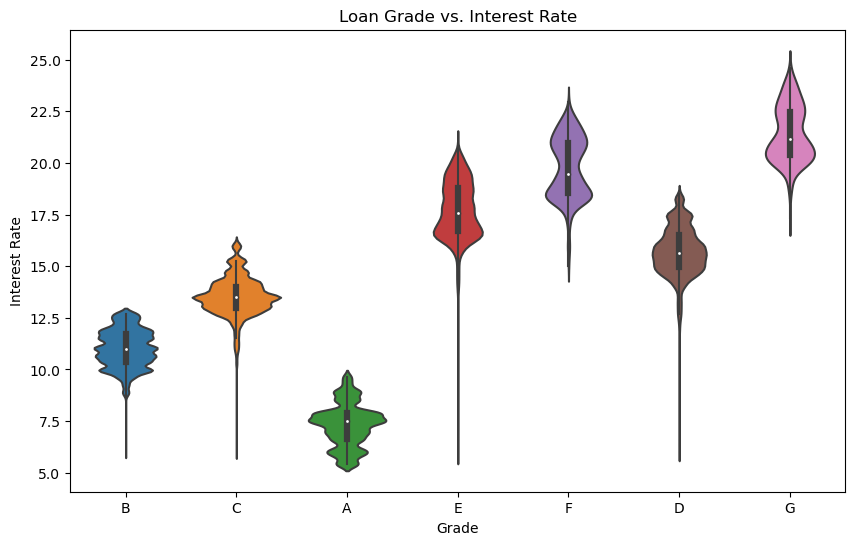

In [24]:
# Convert 'int_rate' column to numeric format
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='grade', y='int_rate')
plt.title('Loan Grade vs. Interest Rate')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()


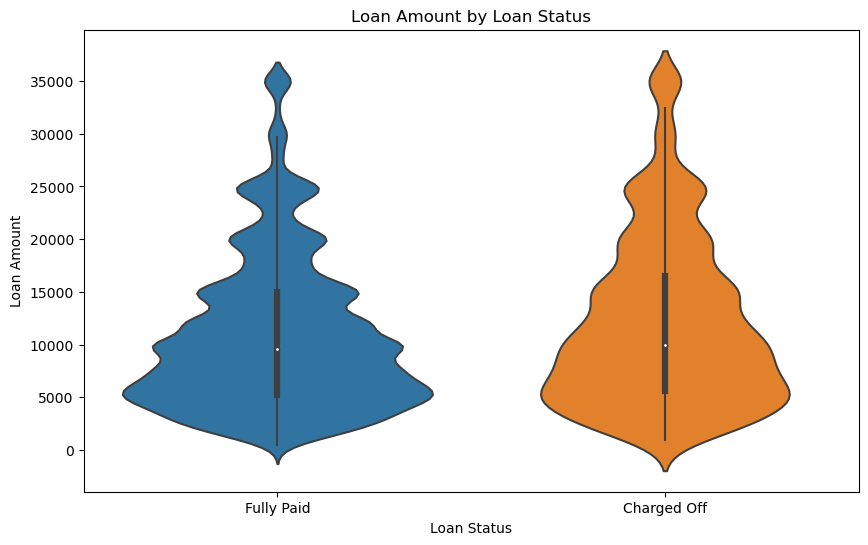

In [26]:
# Create a binary variable for splitting the violins
df['loan_status_binary'] = df['loan_status'].map({'Fully Paid': 'Fully Paid', 'Charged Off': 'Charged Off'})

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='loan_status_binary', y='loan_amnt', split=True)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


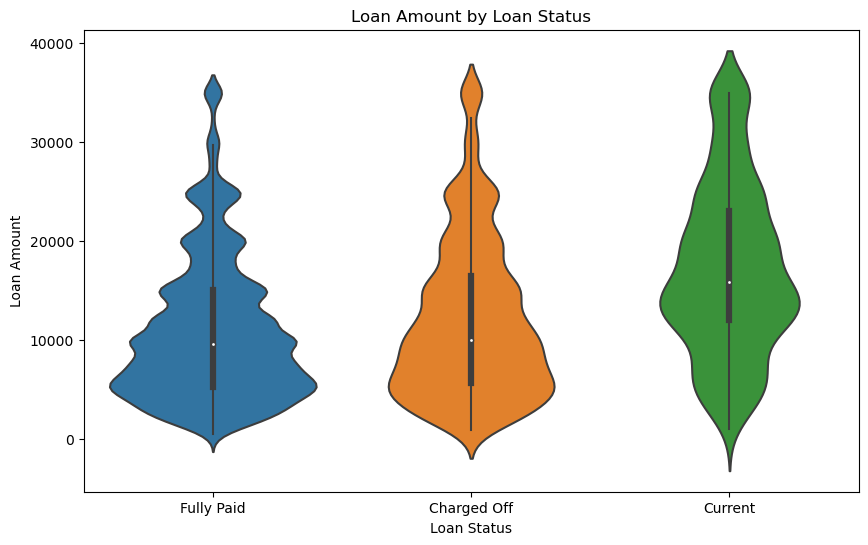

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


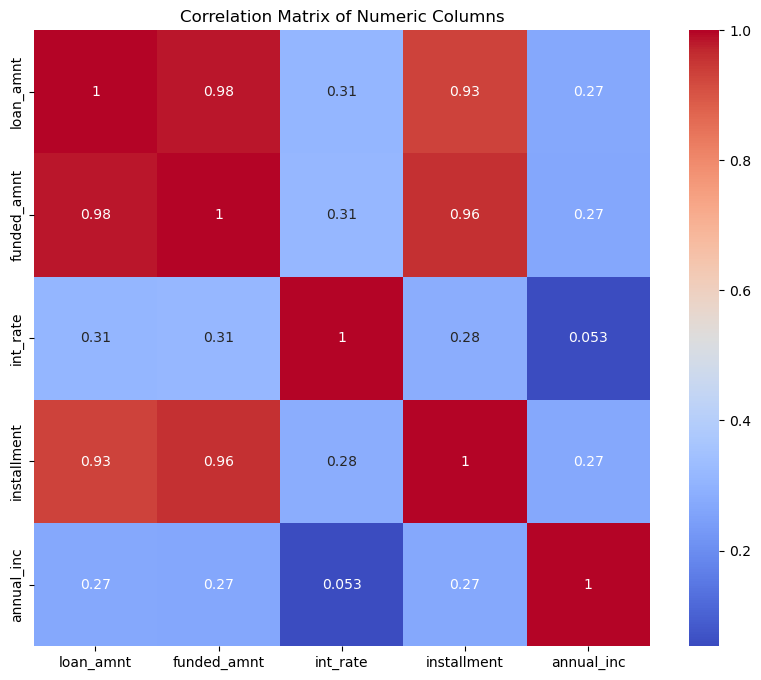

In [29]:
numeric_columns = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc']

# Compute the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


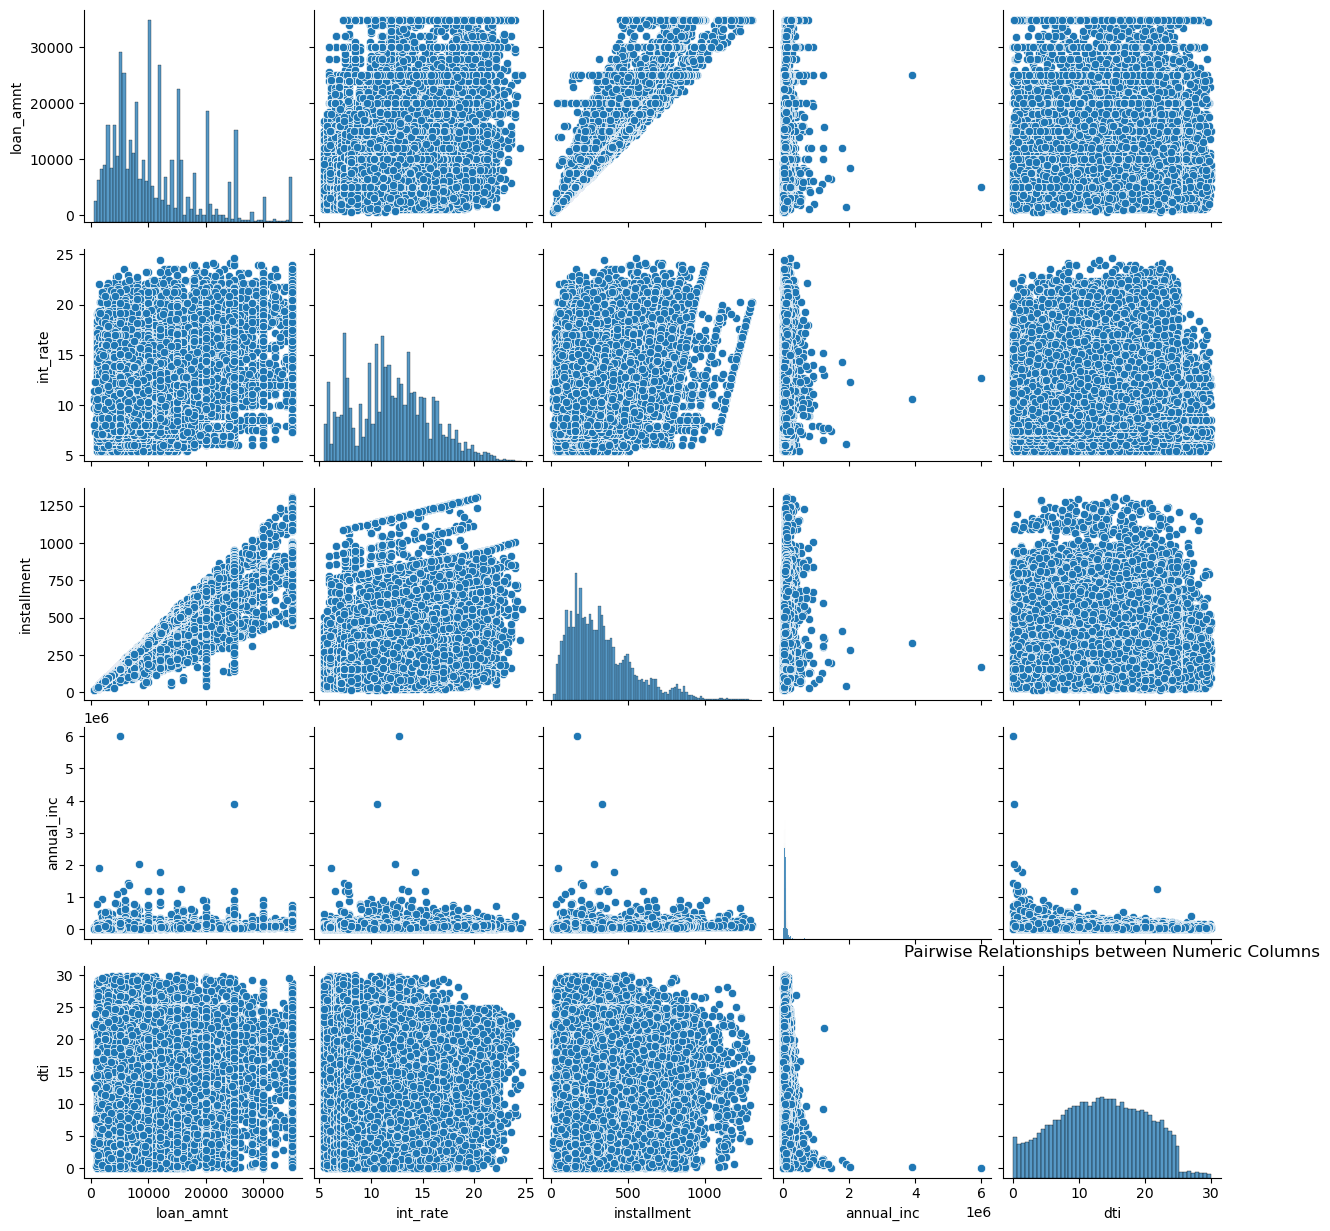

In [30]:
numeric_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

# Create pair plot
sns.pairplot(df[numeric_columns])
plt.title('Pairwise Relationships between Numeric Columns')
plt.show()


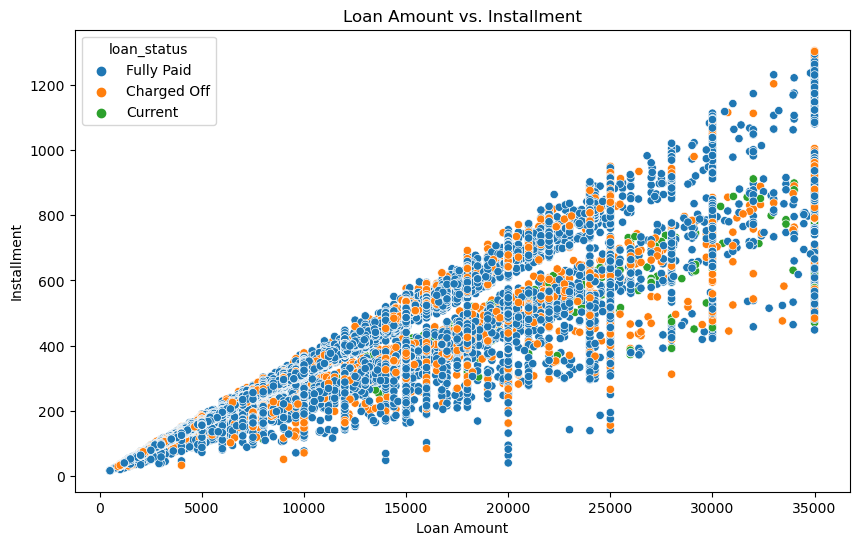

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amnt', y='installment', hue='loan_status')
plt.title('Loan Amount vs. Installment')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.show()


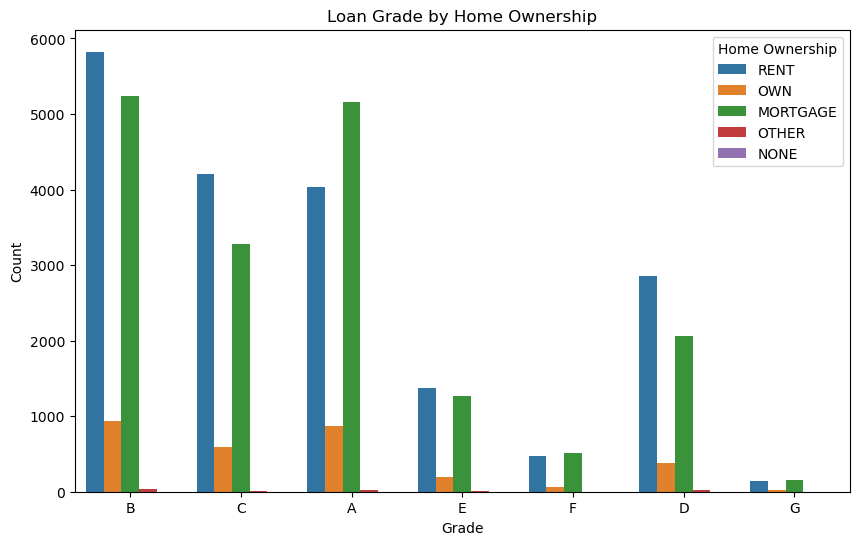

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='home_ownership')
plt.title('Loan Grade by Home Ownership')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Home Ownership')
plt.show()


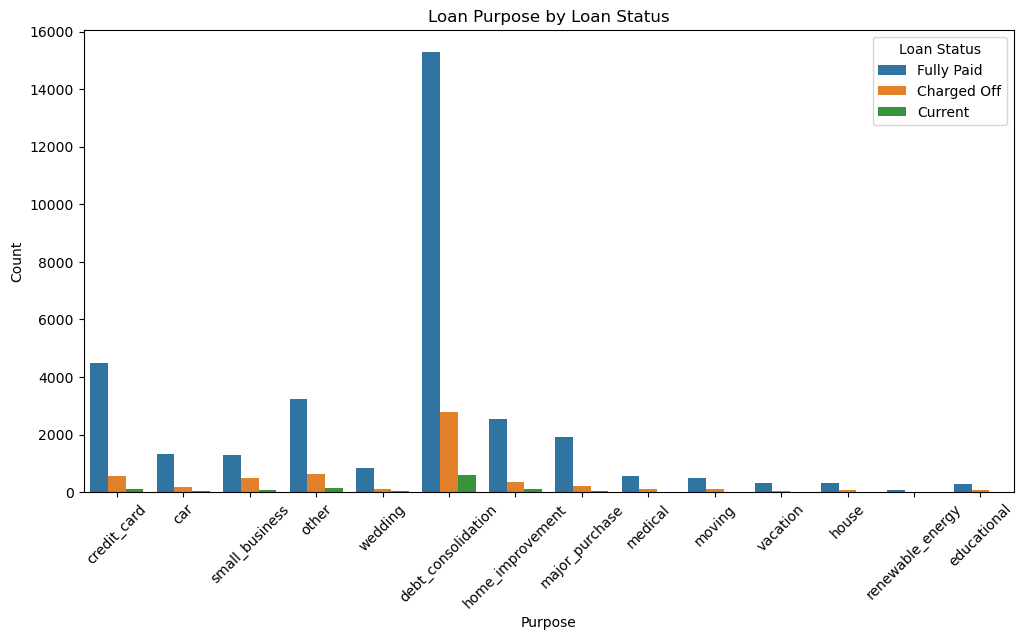

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.title('Loan Purpose by Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


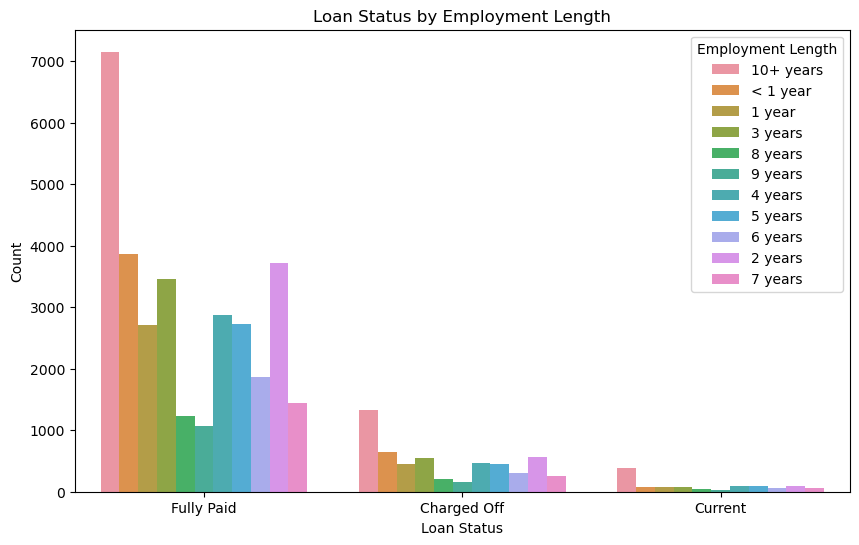

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status', hue='emp_length')
plt.title('Loan Status by Employment Length')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Employment Length')
plt.show()


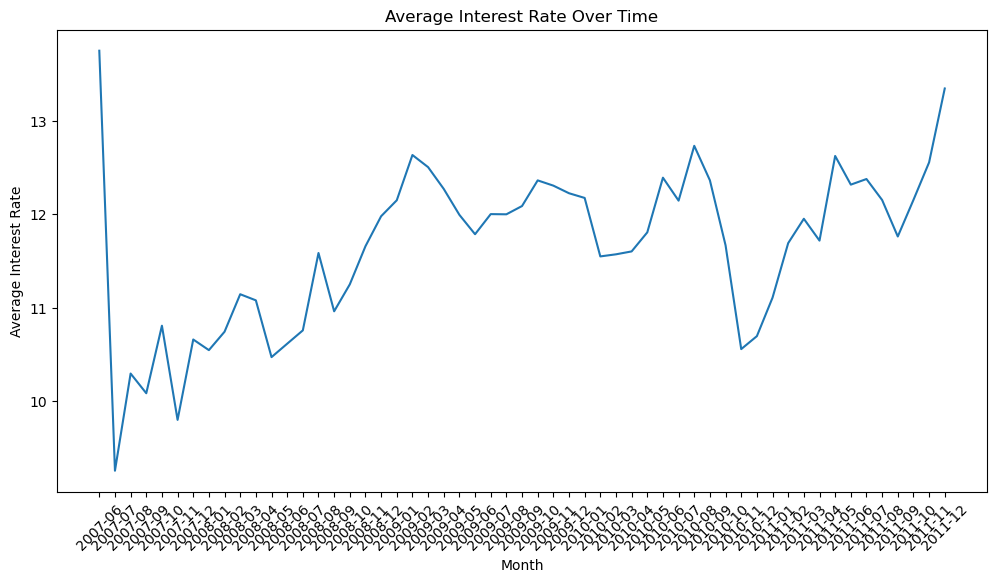

In [36]:
# Convert 'issue_d' column to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Calculate the average interest rate per month
monthly_avg_int_rate = df.groupby(df['issue_d'].dt.to_period('M'))['int_rate'].mean()

# Convert PeriodIndex to string format
monthly_avg_int_rate.index = monthly_avg_int_rate.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_int_rate.index, monthly_avg_int_rate.values)
plt.title('Average Interest Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=45)
plt.show()


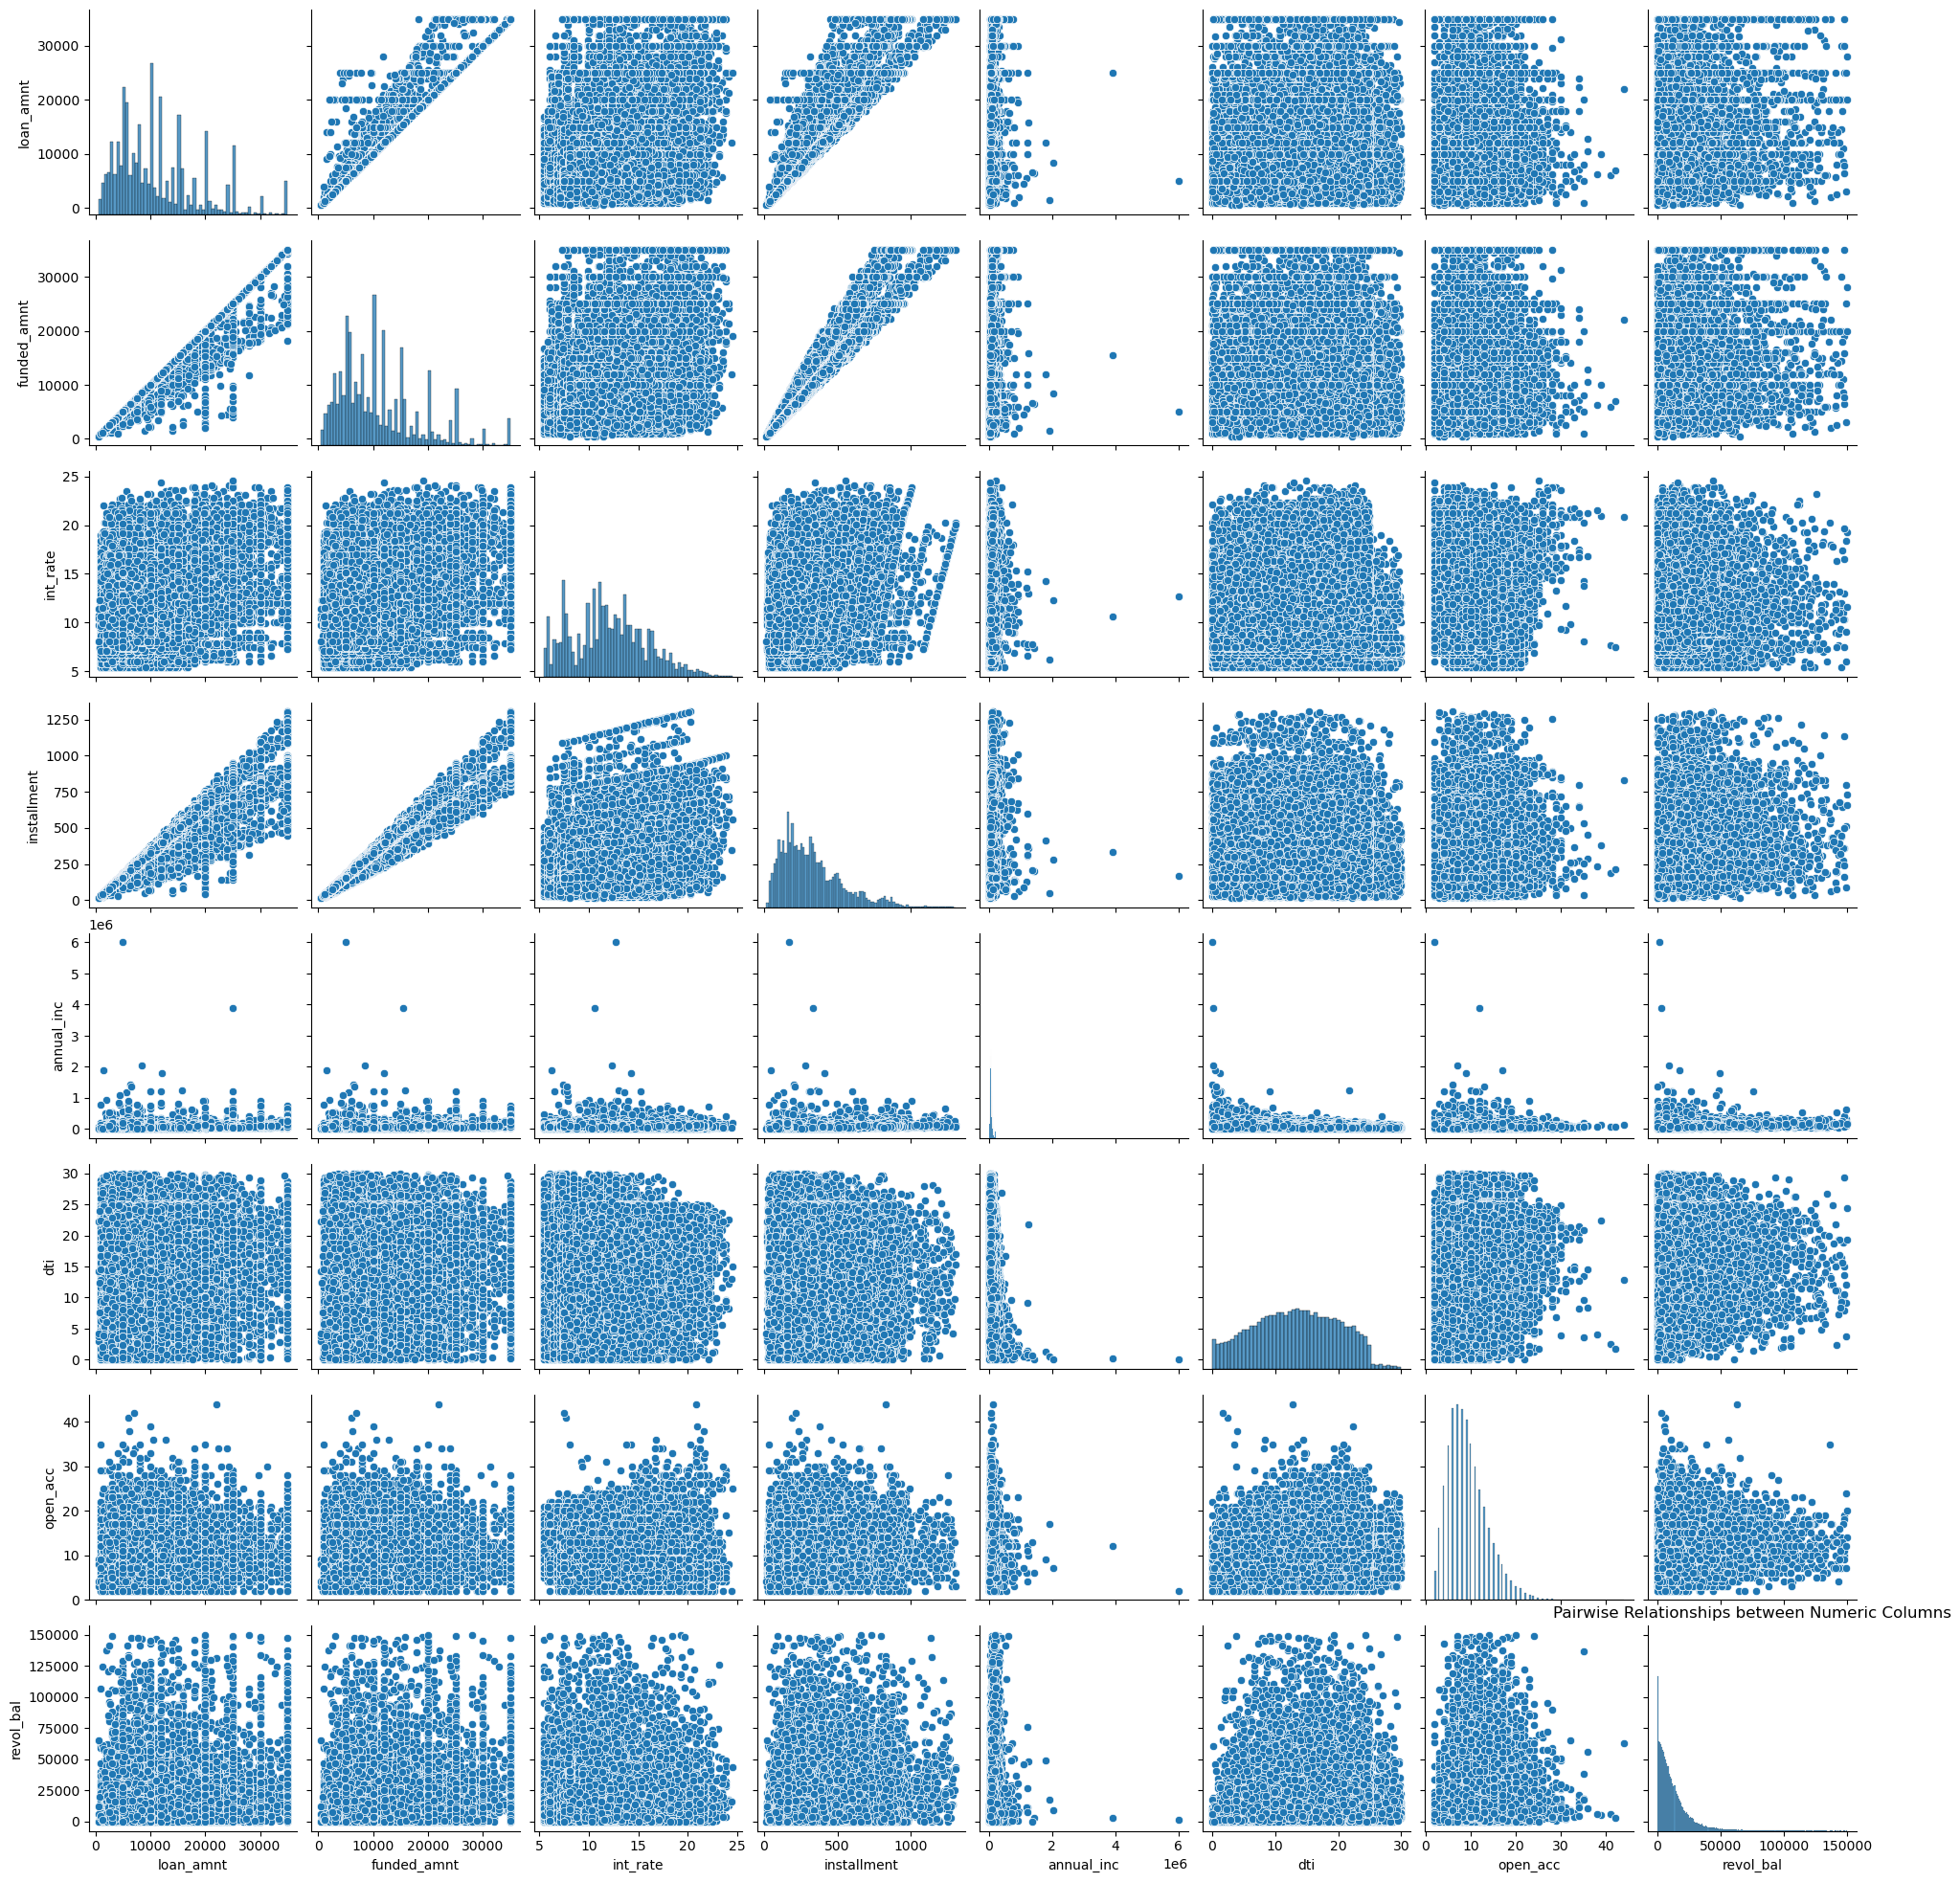

In [37]:
numeric_columns = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal']

# Create pair plot
sns.pairplot(df[numeric_columns])
plt.title('Pairwise Relationships between Numeric Columns')
plt.show()
